#0 Package installing

In [ ]:
"""
그냥 패키지 전에 쓰던거 가지고왔고, 당연히 추가하고 빼도됩니다. 
"""
# loading packages
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt

# PCA packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from functools import reduce
from sklearn.model_selection import TimeSeriesSplit

import pandas_datareader.data as web  # module for reading datasets directly from the web
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1 Data preprocessing 

In [ ]:
#그 Lu Zhang q code monthly data 예요 수업시간에 과제로 썼던것 - 이거 전체가 x입니다 
#the data that made in class code 2-2
frictions = pd.read_csv('/content/drive/MyDrive//DSF_2022/frictions.csv')
intang = pd.read_csv('/content/drive/MyDrive/DSF_2022/intangibles.csv')
invest = pd.read_csv('/content/drive/MyDrive/DSF_2022/investment.csv')
mom = pd.read_csv('/content/drive/MyDrive/DSF_2022/momentum.csv')
profit = pd.read_csv('/content/drive/MyDrive/DSF_2022/profitability.csv')
vag = pd.read_csv('/content/drive/MyDrive/DSF_2022/value_growth.csv')


In [ ]:
#There are unnaed:0 column that is same with index number. Its not necessary so we need to delete it 
frictions = frictions.iloc[:,1:]
intang = intang.iloc[:,1:]
invest = invest.iloc[:,1:]
mom = mom.iloc[:,1:]
profit = profit.iloc[:,1:]
vag = vag.iloc[:,1:]

In [ ]:
print(frictions.shape)
print(intang.shape)
print(invest.shape)
print(mom.shape)
print(profit.shape)
print(vag.shape)

(660, 11)
(660, 31)
(660, 30)
(660, 42)
(660, 47)
(660, 33)


In [ ]:
#Merge all datasets 
dfs = [frictions,intang,invest,mom,profit,vag]
df_merge = reduce(lambda left,right: pd.merge(left,right,on='date',how='left'), dfs)


In [ ]:
#Process the date of the data
total = df_merge
total['date'] =pd.to_datetime(total['date'])
total['date'] =total['date'].dt.strftime('%Y-%m')

In [ ]:
#Check the data set
total['date']

0      1967-01
1      1967-02
2      1967-03
3      1967-04
4      1967-05
        ...   
655    2021-08
656    2021-09
657    2021-10
658    2021-11
659    2021-12
Name: date, Length: 660, dtype: object

In [ ]:
#total.reset_index(inplace = True)
total.rename(columns={'date':'DATE'}, inplace = True)

In [ ]:
#일단 결측치 처리를 0으로 채우긴했는데, 결과 보고 이전값으로 채우거나 하는 방식으로 바꿔볼수 있을것 같아요 
#dataset = total.fillna(0)

dataset = total.dropna(axis=1)

In [ ]:
dataset = dataset.set_index(dataset['DATE'], inplace = False)
dataset =  dataset.drop(columns =['DATE'])

In [ ]:
# from sklearn.preprocessing import RobustScaler
# robustScaler = RobustScaler()
# dataset_rob = robustScaler.fit_transform(dataset)
# dataset_rob = pd.DataFrame(dataset_rob,columns = dataset.columns )

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# dataset = scaler.fit_transform(dataset)

In [ ]:
logdata = np.log(dataset*0.01+1)

In [ ]:
#data = dataset

In [ ]:
dataset.columns[-2:]

Index(['spq_12', 'vhp'], dtype='object')

In [ ]:
dataset

,beta_1,dtv_12,isff_1,ivff_1,me,srev,tv_1,eprd,etl,etr,...,epq_12,ir,rev_1,rev_6,rev_12,sp,spq_1,spq_6,spq_12,vhp
DATE,,,,,,,,,,,,,,,,,,,,,
1967-01,11.8004,-4.4299,3.5865,12.1847,-13.0562,-0.1126,11.4709,8.6986,3.0873,-0.3883,...,9.4271,-10.9358,-3.3122,-3.3122,-3.3122,10.5298,11.8753,11.8753,11.8753,8.9013
1967-02,2.1382,-2.7018,-1.2576,4.7215,-5.1638,2.8017,4.7486,-5.0862,-3.8491,0.6776,...,-3.6533,2.9416,-0.4161,-0.5976,-0.5976,-0.7410,-0.2473,-0.5354,-0.5354,-4.3270
1967-03,0.2358,-1.6275,4.8673,0.6764,-3.3238,-1.5156,0.3803,-0.3200,-0.2502,-3.9915,...,1.8400,-2.6113,0.5145,0.8580,0.8580,1.9728,0.3762,0.2091,0.2091,3.6893
1967-04,3.0167,0.5737,-3.6645,-3.0035,-0.7099,-1.9171,-0.8516,-2.8200,1.0904,-1.7424,...,-2.6575,1.4119,3.7632,3.6845,3.6845,-1.0793,-3.0121,-1.9934,-1.9934,-1.9834
1967-05,1.3046,-6.4407,-1.2705,3.4395,-4.8868,-4.0637,0.6068,1.9194,1.5000,2.3227,...,3.3314,-2.4843,-2.8353,-2.6136,-2.6136,2.0838,4.9051,4.0210,4.0210,0.7269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,0.7348,1.3942,-1.4633,-1.3650,0.6421,2.9832,-0.4001,-1.1960,-0.6989,-0.7664,...,-2.2072,2.4422,1.0257,1.0282,1.2988,-2.4126,-1.2230,-2.0030,-1.6366,-1.6819
2021-09,9.5032,-2.3366,1.9337,1.0624,-1.4418,-1.7750,1.1031,2.1055,2.4773,-1.1027,...,0.3463,-5.9879,-7.5190,-7.2946,-5.7782,1.8645,2.4312,2.6438,2.4803,-1.7282
2021-10,1.7722,5.5664,0.9665,-2.3577,8.4341,2.6571,0.5204,-2.6409,-0.7454,-2.7059,...,-6.8053,8.6927,5.0123,5.3302,6.1313,-5.0713,-8.6452,-7.8362,-7.1274,-13.1422


In [ ]:
logdata

,beta_1,dtv_12,isff_1,ivff_1,me,srev,tv_1,eprd,etl,etr,...,epq_12,ir,rev_1,rev_6,rev_12,sp,spq_1,spq_6,spq_12,vhp
DATE,,,,,,,,,,,,,,,,,,,,,
1967-01,0.111545,-0.045310,0.035237,0.114976,-0.139908,-0.001127,0.108593,0.083409,0.030406,-0.003891,...,0.090088,-0.115813,-0.033683,-0.033683,-0.033683,0.100115,0.112215,0.112215,0.112215,0.085272
1967-02,0.021157,-0.027390,-0.012656,0.046134,-0.053019,0.027632,0.046393,-0.052201,-0.039251,0.006753,...,-0.037217,0.028992,-0.004170,-0.005994,-0.005994,-0.007438,-0.002476,-0.005368,-0.005368,-0.044234
1967-03,0.002355,-0.016409,0.047526,0.006741,-0.033803,-0.015272,0.003796,-0.003205,-0.002505,-0.040733,...,0.018233,-0.026460,0.005132,0.008543,0.008543,0.019536,0.003755,0.002089,0.002089,0.036229
1967-04,0.029721,0.005721,-0.037333,-0.030495,-0.007124,-0.019357,-0.008552,-0.028605,0.010845,-0.017578,...,-0.026934,0.014020,0.036941,0.036182,0.036182,-0.010852,-0.030584,-0.020135,-0.020135,-0.020033
1967-05,0.012962,-0.066575,-0.012786,0.033817,-0.050102,-0.041486,0.006050,0.019012,0.014889,0.022961,...,0.032771,-0.025157,-0.028763,-0.026484,-0.026484,0.020624,0.047886,0.039423,0.039423,0.007243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,0.007321,0.013846,-0.014741,-0.013744,0.006400,0.029396,-0.004009,-0.012032,-0.007014,-0.007694,...,-0.022319,0.024129,0.010205,0.010229,0.012904,-0.024422,-0.012305,-0.020233,-0.016501,-0.016962
2021-09,0.090784,-0.023643,0.019152,0.010568,-0.014523,-0.017909,0.010971,0.020836,0.024471,-0.011088,...,0.003457,-0.061747,-0.078167,-0.075743,-0.059519,0.018473,0.024021,0.026095,0.024500,-0.017433
2021-10,0.017567,0.054170,0.009619,-0.023859,0.080972,0.026224,0.005191,-0.026764,-0.007482,-0.027432,...,-0.070479,0.083354,0.048907,0.051930,0.059507,-0.052044,-0.090419,-0.081603,-0.073942,-0.140898


#model


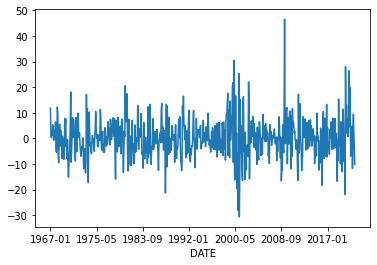

In [ ]:
dataset['beta_1'].plot()

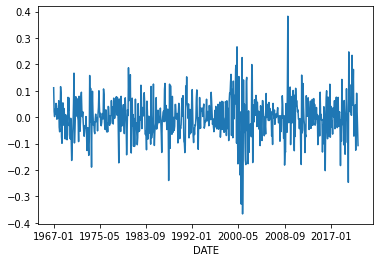

In [ ]:
logdata['beta_1'].plot()

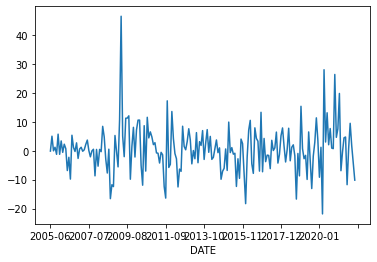

In [ ]:
dataset['beta_1'][-199:].plot()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
660- len(dataset)*0.8

132.0

In [ ]:
seqLength = 6 # window size 
dataDim = 1 
hiddenDim = 10 
outputDim = 1
lr = 0.01
iterations = 500

list_model = []

def buildDataSet(timeSeries, seqLength):
    xdata = []
    ydata = [] 
    for i in range(0, len(timeSeries)-seqLength):
        tx = timeSeries[i:i+seqLength]
        ty = timeSeries[i+seqLength]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)


for i in range(118):
    trainSize = int(len(dataset.iloc[:,i])*0.8)
    trainSet = dataset.iloc[:,i][0:trainSize]
    testSet = dataset.iloc[:,i][trainSize-seqLength:]

    trainX, trainY = buildDataSet(trainSet, seqLength)
    testX, testY = buildDataSet(testSet, seqLength)

    with tf.device('/device:GPU:0'):
        model = keras.Sequential()

        model.add(layers.SimpleRNN(units=10, 
                                activation='tanh',
                                input_shape=[6,1]))
        model.add(layers.Dense(1))
        model.summary()

        # 모델 학습과정 설정 
        model.compile(loss='mse', optimizer='adam', metrics=['mae'])

        # 모델 트레이닝 
        hist = model.fit(trainX, trainY, epochs=50, batch_size=16)

        list_model.append(model)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
33/33 [==============================] - 0s 6ms/step - loss: 3.6526 - mae: 1.2906
Epoch 38/50
33/33 [==============================] - 0s 5ms/step - loss: 3.6487 - mae: 1.2901
Epoch 39/50
33/33 [==============================] - 0s 5ms/step - loss: 3.6448 - mae: 1.2893
Epoch 40/50
33/33 [==============================] - 0s 5ms/step - loss: 3.6471 - mae: 1.2866
Epoch 41/50
33/33 [==============================] - 0s 6ms/step - loss: 3.6295 - mae: 1.2850
Epoch 42/50
33/33 [==============================] - 0s 6ms/step - loss: 3.6269 - mae: 1.2852
Epoch 43/50
33/33 [==============================] - 0s 5ms/step - loss: 3.6248 - mae: 1.2866
Epoch 44/50
33/33 [==============================] - 0s 5ms/step - loss: 3.6180 - mae: 1.2835
Epoch 45/50
33/33 [==============================] - 0s 5ms/step - loss: 3.6160 - mae: 1.2836
Epoch 46/50
33/33 [==============================] - 0s 6ms/step - loss: 3.6106 - mae: 1.2853
Epoch 47/50
33/33 [=================

In [ ]:
len(list_model)

118

In [ ]:
# 모델 테스트
list_test_x = []
list_test_y = []
for i in range(118):
    trainSize = int(len(dataset.iloc[:,i])*0.8)
    trainSet = dataset.iloc[:,i][0:trainSize]
    testSet = dataset.iloc[:,i][trainSize-seqLength:]

    trainX, trainY = buildDataSet(trainSet, seqLength)
    testX, testY = buildDataSet(testSet, seqLength)

    list_test_x.append(testX)
    list_test_y.append(testY)

    res = list_model[i].evaluate(list_test_x[i], list_test_y[i], batch_size=16)
    print("loss",res[0],"mae",res[1])

9/9 [==============================] - 0s 3ms/step - loss: 61.5327 - mae: 5.6860
loss 61.53270721435547 mae 5.685958385467529
9/9 [==============================] - 0s 3ms/step - loss: 11.8891 - mae: 2.6893
loss 11.889114379882812 mae 2.68932843208313
9/9 [==============================] - 0s 2ms/step - loss: 4.7145 - mae: 1.6743
loss 4.714503288269043 mae 1.674317717552185
9/9 [==============================] - 0s 2ms/step - loss: 41.2817 - mae: 4.6712
loss 41.28165817260742 mae 4.671185493469238
9/9 [==============================] - 0s 3ms/step - loss: 24.5044 - mae: 3.9067
loss 24.504375457763672 mae 3.9066660404205322
9/9 [==============================] - 0s 3ms/step - loss: 38.7937 - mae: 3.9411
loss 38.79370880126953 mae 3.94108247756958
9/9 [==============================] - 0s 3ms/step - loss: 60.1535 - mae: 5.3419
loss 60.15350341796875 mae 5.341894149780273
9/9 [==============================] - 0s 2ms/step - loss: 13.0807 - mae: 2.7600
loss 13.080708503723145 mae 2.7600297

In [ ]:
#7 모델 사용
list_predict = []
list_actual = list_test_y
for i in range(118):
    xhat = list_test_x[i]
    yhat = list_model[i].predict(xhat)
    yhat = np.concatenate(yhat)
    list_predict.append(yhat)

5/5 [==============================] - 0s 2ms/step


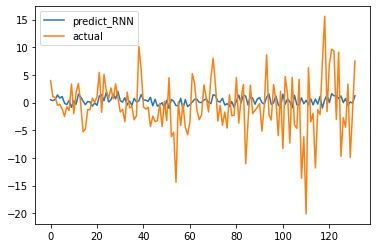

In [ ]:
plt.figure()
plt.plot(list_predict[99], label = "predict_RNN")
plt.plot(list_actual[99],label = "actual")

plt.legend(prop={'size': 10})

In [ ]:
np.where(list_predict[0] in np.sort(list_predict[0])[:10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


(array([], dtype=int64),)

In [ ]:
np.sort(list_predict[0])[:10]

array([-0.01847029, -0.01798351, -0.01666437, -0.01590678, -0.01563406,
       -0.01449657, -0.0135484 , -0.01306984, -0.01174132, -0.01153776],
      dtype=float32)

In [ ]:
np.sort(list_predict[0])[-10:]

array([0.02218029, 0.0240565 , 0.02438759, 0.02450552, 0.02701269,
       0.02747634, 0.02845886, 0.03260764, 0.03637651, 0.03821852],
      dtype=float32)

In [ ]:
list_predict[0][102]

-0.0065786154

In [ ]:
df_predict = pd.DataFrame(data=list_predict)
df_predict.T #예측값 리스트 (logscale) (뒤쪽 199month)


,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,0.921818,-1.555905,-0.216784,0.507426,-1.715958,0.582059,-0.006161,1.060925,0.231481,0.815064,...,0.774587,0.185952,-0.864126,-1.510827,-1.594686,1.474545,1.744405,1.835522,2.360780,0.598506
1,-0.250684,0.022891,0.995024,-1.657771,0.891086,0.412480,-0.531858,-0.723415,0.759400,-0.467554,...,0.586940,0.699679,-0.331164,0.347826,0.900563,0.645312,0.382187,0.384337,-0.361672,1.033343
2,-0.791201,-0.662408,-0.222583,0.709380,-0.135113,1.072130,-0.710599,-0.004273,-0.075016,0.334186,...,0.423435,-0.777221,-1.374681,-0.340426,-1.132627,1.161012,0.712405,1.061652,0.641699,-1.150560
3,-1.643287,-1.641460,0.188515,-2.331415,-2.341688,-0.458757,-0.377641,-0.404866,0.893355,0.859169,...,0.092760,-0.797322,-0.055575,0.387604,0.474716,1.427962,0.674830,0.522438,1.836694,0.850798
4,-2.105942,-0.349189,0.514675,-1.685540,0.383830,-0.700145,-0.506371,-1.252297,0.667818,0.385201,...,0.829942,-0.529674,-0.260521,-0.075514,-0.526195,-0.097087,0.340495,0.646371,-0.109668,0.628098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,-1.371055,0.261436,-0.084163,-1.039234,0.891655,0.729431,-1.828175,-1.033825,0.888507,0.737908,...,-0.037090,0.287876,-0.033984,0.439077,-0.328516,-1.073129,-1.217254,-1.052725,-1.090682,0.276908
128,-1.629615,0.487816,0.331246,0.283571,0.188426,-1.279547,-0.271830,-0.385659,0.319497,0.553288,...,0.432519,0.087723,0.385539,0.294038,0.110359,-0.327351,0.565933,0.082190,0.857619,0.452048
129,1.106156,-0.065281,0.673837,0.846263,-1.616605,-0.453245,-0.207154,0.163164,0.232559,-0.248487,...,0.832708,-0.870466,-0.977372,-1.009346,-0.250942,0.448022,0.776778,1.289489,1.251503,0.222165
130,-0.347369,0.158365,0.088639,-1.096071,0.956352,-1.108885,0.259125,-2.059382,0.343916,0.585333,...,-0.042732,0.315240,-0.261455,-0.727955,-0.324445,-0.641954,-2.316544,-1.352929,-0.439784,-0.225282


In [ ]:
df_predict

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.921818,-0.250684,-0.791201,-1.643287,-2.105942,-2.411774,-2.406812,0.393881,-0.911455,-0.941704,...,1.061570,-1.510117,-2.167323,1.340289,0.255099,-1.371055,-1.629615,1.106156,-0.347369,-2.680436
1,-1.555905,0.022891,-0.662408,-1.641460,-0.349189,0.245392,-1.082132,-0.044549,0.496198,0.481276,...,-1.593034,-0.415518,0.558595,0.218997,-0.120748,0.261436,0.487816,-0.065281,0.158365,0.692534
2,-0.216784,0.995024,-0.222583,0.188515,0.514675,1.109376,0.316475,0.987546,0.737613,-0.038528,...,0.535281,0.631086,0.082556,-0.079048,0.207340,-0.084163,0.331246,0.673837,0.088639,-0.027551
3,0.507426,-1.657771,0.709380,-2.331415,-1.685540,-0.643528,-2.370844,-0.402775,-2.423753,-1.322297,...,-2.742257,-1.794996,-0.310564,0.525219,0.537490,-1.039234,0.283571,0.846263,-1.096071,-1.484989
4,-1.715958,0.891086,-0.135113,-2.341688,0.383830,1.210109,-0.340620,0.097407,1.275083,1.371397,...,-1.355275,0.895860,1.665965,0.096068,-2.321315,0.891655,0.188426,-1.616605,0.956352,0.894401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1.474545,0.645312,1.161012,1.427962,-0.097087,0.466052,0.510303,-0.616037,-0.297170,-0.962548,...,-0.223334,1.447561,-0.627750,1.424547,0.014499,-1.073129,-0.327351,0.448022,-0.641954,0.505805
114,1.744405,0.382187,0.712405,0.674830,0.340495,1.001866,0.364036,-1.222757,-0.261961,-0.368035,...,0.862888,1.658708,-0.428360,2.468990,-2.019684,-1.217254,0.565933,0.776778,-2.316544,-0.084706
115,1.835522,0.384337,1.061652,0.522438,0.646371,0.875481,0.193466,-0.674239,-0.528487,-0.687063,...,0.783071,1.526643,-0.438426,1.387131,-1.003229,-1.052725,0.082190,1.289489,-1.352929,0.487840
116,2.360780,-0.361672,0.641699,1.836694,-0.109668,0.410227,0.412778,-1.176583,-0.949391,-0.306028,...,0.315749,0.898241,-0.353378,1.032225,-0.349836,-1.090682,0.857619,1.251503,-0.439784,0.727920


In [ ]:
df_predict.to_csv('df_predict_132_6d.csv', index=False)

In [ ]:
dataset[-132:].values[0]

array([ 2.1215,  2.762 , -0.137 , -2.2568,  2.2694, -0.3736, -1.3466,
        0.7311,  0.5272, -0.3055, -5.1224, -2.8454, -5.6783, -0.755 ,
        2.4089, -2.8412, -0.6758,  0.8012, -0.6026, -0.119 , -0.7927,
        4.8494,  5.0832, -3.5764, -2.7382, -2.0914, -4.2065,  1.6025,
       -0.8766,  2.0155, -0.3683,  0.402 , -0.5894,  1.7149,  0.6292,
       -1.9105, -0.9245, -0.7183,  0.8749, -2.2957, -2.6293, -2.64  ,
       -2.1137, -3.1044, -0.8888, -3.2954, -0.4925, -0.9407,  1.4423,
        0.9899, -0.3215, -3.8002,  3.7694, -0.4964, -1.1823,  0.1584,
       -3.3976, -3.1065, -1.8714, -1.2985, -2.3202, -1.9753, -1.8251,
       -3.9668, -2.1375, -2.2328, -2.4559, -2.7924, -5.3687, -2.7678,
       -3.1251, -1.1451,  0.0177,  0.9171,  0.974 ,  1.4895, -2.5024,
       -3.1741, -3.0208, -3.6177, -0.2815,  0.2606, -0.341 , -0.2999,
       -0.2243, -0.0929, -3.4337, -3.5118, -2.9027, -1.0649, -0.7155,
       -4.2416, -1.7786, -1.6114,  1.0186,  1.2704,  1.4356,  0.713 ,
        2.1842,  3.9

In [ ]:
df_predict_6d = pd.read_csv('/content/drive/MyDrive/DSF_2022/df_predict_6d.csv').drop('Unnamed: 0', axis=1).T
df_predict_12d = pd.read_csv('/content/drive/MyDrive/DSF_2022/df_predict_12d.csv').drop('Unnamed: 0', axis=1)


In [ ]:
df_predict_6d = df_predict_6d * (-1)
df_predict_12d = df_predict_12d * (-1)

In [ ]:
df_predict_6d

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
0,-0.005455,-0.000746,-0.001972,-0.003297,-0.003375,-0.013539,-0.008326,-0.009752,-0.005352,-0.007738,...,-0.016237,-0.012899,-0.021736,-0.018979,-0.017182,-0.012903,-0.000337,-0.012587,-0.007679,-0.001877
1,-0.002602,-0.003663,-0.007105,-0.008755,-0.007402,-0.003051,-0.001789,-0.003440,-0.004815,-0.005428,...,-0.000522,-0.004045,0.003813,0.004326,0.004019,-0.005759,-0.009290,-0.008217,-0.008089,-0.011539
2,-0.006267,-0.007864,-0.006267,-0.006535,-0.006919,-0.004643,-0.005470,-0.006801,-0.007705,-0.007646,...,-0.005029,-0.005369,-0.009614,-0.007242,-0.006672,-0.001559,-0.003013,-0.007680,-0.008443,-0.008628
3,-0.007988,-0.002112,-0.003603,-0.003852,-0.006938,-0.013311,-0.011850,-0.011628,-0.008112,-0.005319,...,-0.007070,-0.002336,-0.018828,-0.009766,-0.015429,0.013377,0.009343,-0.002273,-0.003342,-0.001373
4,-0.001975,-0.005970,-0.008394,-0.010705,-0.008056,-0.001502,0.000044,-0.000787,-0.003802,-0.005410,...,0.001845,-0.003670,0.010625,0.012864,0.017374,-0.001837,-0.013286,-0.010551,-0.009855,-0.008825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.007784,-0.011286,-0.007101,-0.004042,-0.005163,-0.009615,-0.010193,-0.009207,-0.010108,-0.004380,...,-0.009121,-0.009747,-0.015167,-0.008531,-0.020885,-0.002336,-0.015695,-0.004478,-0.009581,-0.000110
114,-0.008482,-0.010151,-0.006806,-0.003346,-0.004320,-0.011189,-0.010697,-0.009056,-0.008250,-0.004403,...,-0.009909,-0.010321,-0.010642,-0.005754,-0.016075,-0.008382,-0.018714,-0.004215,-0.005540,0.005385
115,-0.007970,-0.010447,-0.006716,-0.002771,-0.004450,-0.010199,-0.010279,-0.008604,-0.007511,-0.004576,...,-0.010168,-0.010716,-0.013549,-0.007708,-0.019822,-0.007176,-0.018029,-0.003251,-0.006036,0.004763
116,-0.007717,-0.010789,-0.006470,-0.003084,-0.004261,-0.009975,-0.010308,-0.009161,-0.008816,-0.004775,...,-0.009998,-0.010724,-0.015119,-0.008342,-0.021627,-0.005725,-0.018109,-0.003333,-0.006901,0.003332


In [ ]:
df_predict_6d.iloc[:,0]

0     -0.005455
1     -0.002602
2     -0.006267
3     -0.007988
4     -0.001975
         ...   
113   -0.007784
114   -0.008482
115   -0.007970
116   -0.007717
117   -0.009469
Name: 0, Length: 118, dtype: float64

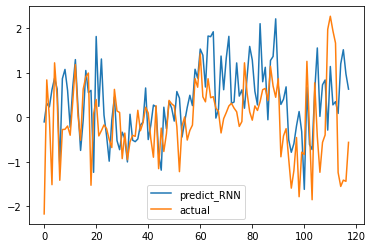

In [ ]:
plt.figure()
plt.plot(df_predict.iloc[:,95], label = "predict_RNN")
plt.plot(dataset[-132:].values[95]/4,label = "actual")

plt.legend(prop={'size': 10})

In [ ]:
df_predict.iloc[:,0].sort_values()[:10].index #하위 10개

Int64Index([34, 6, 110, 41, 31, 111, 89, 25, 87, 88], dtype='int64')

In [ ]:
df_predict_12d.iloc[:,0].sort_values()[-10:] #상위 10개

117    0.003602
64     0.003722
107    0.003754
106    0.004075
57     0.004119
105    0.004147
63     0.004283
56     0.005033
97     0.005844
60     0.007187
Name: 0, dtype: float64

In [ ]:
dataset[-132:]

,beta_1,dtv_12,isff_1,ivff_1,me,srev,tv_1,eprd,etl,etr,...,epq_12,ir,rev_1,rev_6,rev_12,sp,spq_1,spq_6,spq_12,vhp
DATE,,,,,,,,,,,,,,,,,,,,,
2011-01,2.1215,2.7620,-0.1370,-2.2568,2.2694,-0.3736,-1.3466,0.7311,0.5272,-0.3055,...,1.5187,1.4313,1.0561,0.4142,0.9604,0.6377,0.4969,0.7714,0.8919,0.5685
2011-02,2.7860,-2.5416,2.5421,1.7624,-1.3858,1.3368,1.3331,2.4687,-0.0808,0.5612,...,1.6677,-3.7479,-3.2648,-3.0470,-2.6989,3.6771,2.2199,3.0916,3.3642,-3.0963
2011-03,-0.7436,-2.2082,0.3413,-2.1447,-1.4675,1.8794,-1.3429,0.9429,-1.3881,-2.6208,...,-1.1621,0.5454,0.9952,0.4235,1.3298,2.2708,-1.8257,-0.3090,0.3474,0.7242
2011-04,-0.8633,1.5955,0.8501,-1.8239,2.8365,-0.2514,-2.0335,-3.1069,0.4011,-0.8122,...,-1.3461,-1.4842,-0.1141,0.1982,-0.1926,-1.4680,-0.0645,-0.4784,-0.7801,-0.1261
2011-05,-4.2485,-0.3740,-0.8284,-0.2002,1.4053,1.9960,-2.7627,-4.3800,-0.8340,-0.7187,...,-1.8352,2.2196,0.2651,-0.3294,-0.6969,-0.7235,0.2469,-0.0757,-0.2981,-0.2521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,0.7348,1.3942,-1.4633,-1.3650,0.6421,2.9832,-0.4001,-1.1960,-0.6989,-0.7664,...,-2.2072,2.4422,1.0257,1.0282,1.2988,-2.4126,-1.2230,-2.0030,-1.6366,-1.6819
2021-09,9.5032,-2.3366,1.9337,1.0624,-1.4418,-1.7750,1.1031,2.1055,2.4773,-1.1027,...,0.3463,-5.9879,-7.5190,-7.2946,-5.7782,1.8645,2.4312,2.6438,2.4803,-1.7282
2021-10,1.7722,5.5664,0.9665,-2.3577,8.4341,2.6571,0.5204,-2.6409,-0.7454,-2.7059,...,-6.8053,8.6927,5.0123,5.3302,6.1313,-5.0713,-8.6452,-7.8362,-7.1274,-13.1422


In [ ]:
dataset.columns[[1,2]]

Index(['dtv_12', 'isff_1'], dtype='object')

In [ ]:
rate_value = int(118*0.1)

sum_high=0
sum_low=0

high_index=[]
low_index=[]

list_HmL = []
list_high = []
list_low = []
list_high_name = []
list_low_name = []

for j in range(132):
    
    high_index.append(df_predict.iloc[:,j].sort_values()[-rate_value:].index.astype(int))
    low_index.append(df_predict.iloc[:,j].sort_values()[:rate_value].index.astype(int))

    high = 0
    low = 0
    for i in range(rate_value):
        high += dataset[-132:].values[j][high_index[j][i]]
        low += dataset[-132:].values[j][low_index[j][i]]

    list_HmL.append(high-low)
    list_high.append(high)
    list_low.append(low)
    list_high_name.append(', '.join(dataset.columns[high_index[j]]))
    list_low_name.append(', '.join(dataset.columns[low_index[j]]))

    sum_high += high
    sum_low += low

print(sum_high)
print(sum_low)

735.8910999999998
-179.43190000000013


In [ ]:
df_hml_4_1 = pd.DataFrame(list_high, columns=['High(12d,25%)'])
df_hml_4_2 = pd.DataFrame(list_low, columns=['Low(12d,25%)'])
df_hml_4_3 = pd.DataFrame(list_HmL, columns=['High-Low(12d,25%)'])
df_hml_4_4 = pd.DataFrame(list_high_name, columns=['High_ANOMALIES(12d,25%)'])
df_hml_4_5 = pd.DataFrame(list_low_name, columns=['LOW-ANOMALIES(12d,25%)'])

df_hml_4 = pd.concat([df_hml_4_1,df_hml_4_2,df_hml_4_3,df_hml_4_4,df_hml_4_5], axis=1)
df_hml_4

,"High(12d,25%)","Low(12d,25%)","High-Low(12d,25%)","High_ANOMALIES(12d,25%)","LOW-ANOMALIES(12d,25%)"
0,9.6668,-28.7714,38.4382,"ol, cpq_12, epq_1, srev, resid6_6, eg_1, oca, ...","dpia, tv_1, rev_1, noa, dnca, rev_6, roe_1, db..."
1,21.1869,-37.7893,58.9762,"epq_6, tbiq_12, sim_1, gpa, dtv_12, ebp, ilr_6...","eprd, tv_1, ivff_1, oca, dnca, cto, ivc, cei, ..."
2,30.8945,-1.7007,32.5952,"sgq_1, ilr_6, r1n, resid6_6, dfin, eg_6, im_1,...","tv_1, dwc, ig2, rev_1, dnca, dtv_12, ep, ta, i..."
3,13.3187,13.4789,-0.1602,"cop, r5n, ilr_6, rev_6, im_12, resid6_6, dp, p...","tv_1, me, dtv_12, dpia, eprd, beta_1, ivff_1, ..."
4,17.5938,-10.8363,28.4301,"r5n, dp, resid6_12, aci, ia, r5a, vhp, cpq_12,...","tv_1, beta_1, ivff_1, pta, r10n, srev, rev_12,..."
...,...,...,...,...,...
127,41.3997,-37.0624,78.4621,"droe_6, ta, rev_12, cpq_6, ope, oca, cim_1, r5...","tv_1, spq_6, ivff_1, eprd, bmq_12, nsi, beta_1..."
128,-77.2391,8.8815,-86.1206,"vhp, roe_1, spq_6, roe_6, r1n, eg_6, cim_1, r6...","beta_1, srev, ivc, dwc, ivg, dp, nsi, pda, noa..."
129,-66.6138,84.7912,-151.4050,"r1n, tbiq_6, ilr_1, r6_12, ebp, cpq_12, tbiq_1...","rev_6, aci, p52w_12, em, srev, ta, ir, resid11..."
130,136.4989,-40.1194,176.6183,"eg_1, ile_1, resid6_12, ato, r5a, droe_1, etr,...","eprd, ivff_1, spq_1, dur, ta, bmq_12, nsi, spq..."


In [ ]:
df_hml_3_1 = pd.DataFrame(list_high, columns=['High(12d,10%)'])
df_hml_3_2 = pd.DataFrame(list_low, columns=['Low(12d,10%)'])
df_hml_3_3 = pd.DataFrame(list_HmL, columns=['High-Low(12d,10%)'])
df_hml_3_4 = pd.DataFrame(list_high_name, columns=['High_ANOMALIES(12d,10%)'])
df_hml_3_5 = pd.DataFrame(list_low_name, columns=['LOW-ANOMALIES(12d,10%)'])

df_hml_3 = pd.concat([df_hml_3_1,df_hml_3_2,df_hml_3_3,df_hml_3_4,df_hml_3_5], axis=1)
df_hml_3

,"High(12d,10%)","Low(12d,10%)","High-Low(12d,10%)","High_ANOMALIES(12d,10%)","LOW-ANOMALIES(12d,10%)"
0,5.3083,-8.7865,14.0948,"ile_1, cp, sue_1, bm, cpq_1, ebp, spq_6, cim_1...","dpia, tv_1, rev_1, noa, dnca, rev_6, roe_1, db..."
1,8.2858,-14.9189,23.2047,"r11_6, bmq_12, rev_1, r15a, p52w_12, etl, r11_...","eprd, tv_1, ivff_1, oca, dnca, cto, ivc, cei, ..."
2,17.8330,-2.1240,19.9570,"r11_6, r11_1, sue_1, r11_12, dp, im_6, ile_1, ...","tv_1, dwc, ig2, rev_1, dnca, dtv_12, ep, ta, i..."
3,11.3979,-2.5161,13.9140,"r6_6, cpq_1, cpq_6, p52w_6, ile_1, r11_6, cpq_...","tv_1, me, dtv_12, dpia, eprd, beta_1, ivff_1, ..."
4,10.6769,-9.3355,20.0124,"dcoa, eg_1, cla, cim_1, sue_1, r10a, dpia, r11...","tv_1, beta_1, ivff_1, pta, r10n, srev, rev_12,..."
...,...,...,...,...,...
127,25.8898,-19.3689,45.2587,"cto, eg_1, opa, r11_1, r11_6, me, sim_1, roe_1...","tv_1, spq_6, ivff_1, eprd, bmq_12, nsi, beta_1..."
128,-19.1598,12.0160,-31.1758,"eg_12, dtv_12, spq_12, ope, ilr_1, im_1, r1a, ...","beta_1, srev, ivc, dwc, ivg, dp, nsi, pda, noa..."
129,-24.0497,39.7984,-63.8481,"resid6_12, bm, spq_1, r15a, sim_1, im_6, bmq_1...","rev_6, aci, p52w_12, em, srev, ta, ir, resid11..."
130,60.9498,-20.4479,81.3977,"resid11_6, cto, resid6_6, r11_1, r6_1, im_12, ...","eprd, ivff_1, spq_1, dur, ta, bmq_12, nsi, spq..."


In [ ]:
df_hml_2_1 = pd.DataFrame(list_high, columns=['High(6d,25%)'])
df_hml_2_2 = pd.DataFrame(list_low, columns=['Low(6d,25%)'])
df_hml_2_3 = pd.DataFrame(list_HmL, columns=['High-Low(6d,25%)'])
df_hml_2_4 = pd.DataFrame(list_high_name, columns=['High_ANOMALIES(6d,25%)'])
df_hml_2_5 = pd.DataFrame(list_low_name, columns=['LOW-ANOMALIES(6d,25%)'])

df_hml_2 = pd.concat([df_hml_2_1,df_hml_2_2,df_hml_2_3,df_hml_2_4,df_hml_2_5], axis=1)
df_hml_2

,"High(6d,25%)","Low(6d,25%)","High-Low(6d,25%)","High_ANOMALIES(6d,25%)","LOW-ANOMALIES(6d,25%)"
0,-4.0112,-16.2344,12.2232,"ol, epq_1, sgq_1, epq_12, eg_1, etr, droe_6, d...","noa, me, dbe, rev_12, dtv_12, rev_6, opa, ope,..."
1,27.0944,-30.2399,57.3343,"epq_1, ir, r11_1, droe_1, r1a, etl, bmj, epq_6...","ivff_1, cei, ope, r10n, dnco, ig, dpia, oca, e..."
2,38.8574,0.0826,38.7748,"ioca, aci, epq_6, tbiq_12, im_6, sgq_1, r1a, s...","bm, rev_1, pta, ia, ig2, vhp, ig, rev_12, cla,..."
3,17.7891,4.8988,12.8903,"ta, cop, ioca, gpa, r11_1, droe_1, sim_1, resi...","me, ivff_1, beta_1, dtv_12, dnoa, r5n, dpia, d..."
4,16.2749,-6.2851,22.5600,"cpq_6, epq_12, oca, ope, r1a, r6_12, cla, sue_...","pta, beta_1, r10n, ivff_1, eprd, bm, srev, dno..."
...,...,...,...,...,...
127,55.8954,-27.4311,83.3265,"me, ato, eg_12, r1a, gpa, im_12, cim_1, ope, i...","tv_1, cei, beta_1, spq_1, bmq_12, spq_12, sp, ..."
128,-55.4375,-3.3609,-52.0766,"dnca, im_6, ig, p52w_6, resid11_12, r20a, spq_...","beta_1, noa, nsi, srev, ta, dp, dlno, r5n, pda..."
129,-39.2430,65.6619,-104.9049,"epq_12, resid11_6, eg_6, ivff_1, ilr_1, r6_1, ...","noa, me, em, poa, cto, sue_6, pta, ope, rev_6,..."
130,149.0274,-33.8823,182.9097,"r11_6, r11_1, droe_6, r20a, resid11_12, gpa, i...","spq_1, eprd, dnca, spq_6, nsi, dur, pta, srev,..."


In [ ]:
df_hml_1_1 = pd.DataFrame(list_high, columns=['High(6d,10%)'])
df_hml_1_2 = pd.DataFrame(list_low, columns=['Low(6d,10%)'])
df_hml_1_3 = pd.DataFrame(list_HmL, columns=['High-Low(6d,10%)'])
df_hml_1_4 = pd.DataFrame(list_high_name, columns=['High_ANOMALIES(6d,10%)'])
df_hml_1_5 = pd.DataFrame(list_low_name, columns=['LOW-ANOMALIES(6d,10%)'])

df_hml_1 = pd.concat([df_hml_1_1,df_hml_1_2,df_hml_1_3,df_hml_1_4,df_hml_1_5], axis=1)
df_hml_1

,"High(6d,10%)","Low(6d,10%)","High-Low(6d,10%)","High_ANOMALIES(6d,10%)","LOW-ANOMALIES(6d,10%)"
0,-3.1463,-5.8132,2.6669,"droe_1, eg_6, im_6, bmq_12, cpq_1, sp, sim_1, ...","noa, me, dbe, rev_12, dtv_12, rev_6, opa, ope,..."
1,7.8925,-14.1867,22.0792,"vhp, p52w_12, r11_12, r6_1, r15a, ioca, im_1, ...","ivff_1, cei, ope, r10n, dnco, ig, dpia, oca, e..."
2,22.3391,3.6138,18.7253,"oca, resid6_6, cpq_1, r1n, r11_6, r6_6, cim_1,...","bm, rev_1, pta, ia, ig2, vhp, ig, rev_12, cla,..."
3,4.0625,4.2094,-0.1469,"im_12, im_1, r11_12, cla, r6_1, cpq_12, r5a, s...","me, ivff_1, beta_1, dtv_12, dnoa, r5n, dpia, d..."
4,-6.0234,-5.7864,-0.2370,"r11_6, cpq_1, r10a, aci, r1n, epq_1, r15a, r5a...","pta, beta_1, r10n, ivff_1, eprd, bm, srev, dno..."
...,...,...,...,...,...
127,25.9692,-16.7447,42.7139,"r11_1, cla, r11_6, droe_1, r6_12, roe_6, p52w_...","tv_1, cei, beta_1, spq_1, bmq_12, spq_12, sp, ..."
128,-9.7492,-4.0102,-5.7390,"cop, r6_6, bm, ilr_1, eg_12, r1a, r11_1, resid...","beta_1, noa, nsi, srev, ta, dp, dlno, r5n, pda..."
129,-29.1683,38.3434,-67.5117,"eg_1, r15a, cp, spq_12, spq_6, ep, r11_6, bmj,...","noa, me, em, poa, cto, sue_6, pta, ope, rev_6,..."
130,43.1395,-19.2452,62.3847,"r5a, droe_1, ol, r11_12, cim_1, im_12, eg_1, e...","spq_1, eprd, dnca, spq_6, nsi, dur, pta, srev,..."


In [ ]:
df_hml_final = pd.concat([df_hml_1,df_hml_2,df_hml_3,df_hml_4], axis=1)
df_hml_final

,"High(6d,10%)","Low(6d,10%)","High-Low(6d,10%)","High_ANOMALIES(6d,10%)","LOW-ANOMALIES(6d,10%)","High(6d,25%)","Low(6d,25%)","High-Low(6d,25%)","High_ANOMALIES(6d,25%)","LOW-ANOMALIES(6d,25%)","High(12d,10%)","Low(12d,10%)","High-Low(12d,10%)","High_ANOMALIES(12d,10%)","LOW-ANOMALIES(12d,10%)","High(12d,25%)","Low(12d,25%)","High-Low(12d,25%)","High_ANOMALIES(12d,25%)","LOW-ANOMALIES(12d,25%)"
0,-3.1463,-5.8132,2.6669,"droe_1, eg_6, im_6, bmq_12, cpq_1, sp, sim_1, ...","noa, me, dbe, rev_12, dtv_12, rev_6, opa, ope,...",-4.0112,-16.2344,12.2232,"ol, epq_1, sgq_1, epq_12, eg_1, etr, droe_6, d...","noa, me, dbe, rev_12, dtv_12, rev_6, opa, ope,...",5.3083,-8.7865,14.0948,"ile_1, cp, sue_1, bm, cpq_1, ebp, spq_6, cim_1...","dpia, tv_1, rev_1, noa, dnca, rev_6, roe_1, db...",9.6668,-28.7714,38.4382,"ol, cpq_12, epq_1, srev, resid6_6, eg_1, oca, ...","dpia, tv_1, rev_1, noa, dnca, rev_6, roe_1, db..."
1,7.8925,-14.1867,22.0792,"vhp, p52w_12, r11_12, r6_1, r15a, ioca, im_1, ...","ivff_1, cei, ope, r10n, dnco, ig, dpia, oca, e...",27.0944,-30.2399,57.3343,"epq_1, ir, r11_1, droe_1, r1a, etl, bmj, epq_6...","ivff_1, cei, ope, r10n, dnco, ig, dpia, oca, e...",8.2858,-14.9189,23.2047,"r11_6, bmq_12, rev_1, r15a, p52w_12, etl, r11_...","eprd, tv_1, ivff_1, oca, dnca, cto, ivc, cei, ...",21.1869,-37.7893,58.9762,"epq_6, tbiq_12, sim_1, gpa, dtv_12, ebp, ilr_6...","eprd, tv_1, ivff_1, oca, dnca, cto, ivc, cei, ..."
2,22.3391,3.6138,18.7253,"oca, resid6_6, cpq_1, r1n, r11_6, r6_6, cim_1,...","bm, rev_1, pta, ia, ig2, vhp, ig, rev_12, cla,...",38.8574,0.0826,38.7748,"ioca, aci, epq_6, tbiq_12, im_6, sgq_1, r1a, s...","bm, rev_1, pta, ia, ig2, vhp, ig, rev_12, cla,...",17.8330,-2.1240,19.9570,"r11_6, r11_1, sue_1, r11_12, dp, im_6, ile_1, ...","tv_1, dwc, ig2, rev_1, dnca, dtv_12, ep, ta, i...",30.8945,-1.7007,32.5952,"sgq_1, ilr_6, r1n, resid6_6, dfin, eg_6, im_1,...","tv_1, dwc, ig2, rev_1, dnca, dtv_12, ep, ta, i..."
3,4.0625,4.2094,-0.1469,"im_12, im_1, r11_12, cla, r6_1, cpq_12, r5a, s...","me, ivff_1, beta_1, dtv_12, dnoa, r5n, dpia, d...",17.7891,4.8988,12.8903,"ta, cop, ioca, gpa, r11_1, droe_1, sim_1, resi...","me, ivff_1, beta_1, dtv_12, dnoa, r5n, dpia, d...",11.3979,-2.5161,13.9140,"r6_6, cpq_1, cpq_6, p52w_6, ile_1, r11_6, cpq_...","tv_1, me, dtv_12, dpia, eprd, beta_1, ivff_1, ...",13.3187,13.4789,-0.1602,"cop, r5n, ilr_6, rev_6, im_12, resid6_6, dp, p...","tv_1, me, dtv_12, dpia, eprd, beta_1, ivff_1, ..."
4,-6.0234,-5.7864,-0.2370,"r11_6, cpq_1, r10a, aci, r1n, epq_1, r15a, r5a...","pta, beta_1, r10n, ivff_1, eprd, bm, srev, dno...",16.2749,-6.2851,22.5600,"cpq_6, epq_12, oca, ope, r1a, r6_12, cla, sue_...","pta, beta_1, r10n, ivff_1, eprd, bm, srev, dno...",10.6769,-9.3355,20.0124,"dcoa, eg_1, cla, cim_1, sue_1, r10a, dpia, r11...","tv_1, beta_1, ivff_1, pta, r10n, srev, rev_12,...",17.5938,-10.8363,28.4301,"r5n, dp, resid6_12, aci, ia, r5a, vhp, cpq_12,...","tv_1, beta_1, ivff_1, pta, r10n, srev, rev_12,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,25.9692,-16.7447,42.7139,"r11_1, cla, r11_6, droe_1, r6_12, roe_6, p52w_...","tv_1, cei, beta_1, spq_1, bmq_12, spq_12, sp, ...",55.8954,-27.4311,83.3265,"me, ato, eg_12, r1a, gpa, im_12, cim_1, ope, i...","tv_1, cei, beta_1, spq_1, bmq_12, spq_12, sp, ...",25.8898,-19.3689,45.2587,"cto, eg_1, opa, r11_1, r11_6, me, sim_1, roe_1...","tv_1, spq_6, ivff_1, eprd, bmq_12, nsi, beta_1...",41.3997,-37.0624,78.4621,"droe_6, ta, rev_12, cpq_6, ope, oca, cim_1, r5...","tv_1, spq_6, ivff_1, eprd, bmq_12, nsi, beta_1..."
128,-9.7492,-4.0102,-5.7390,"cop, r6_6, bm, ilr_1, eg_12, r1a, r11_1, resid...","beta_1, noa, nsi, srev, ta, dp, dlno, r5n, pda...",-55.4375,-3.3609,-52.0766,"dnca, im_6, ig, p52w_6, resid11_12, r20a, spq_...","beta_1, noa, nsi, srev, ta, dp, dlno, r5n, pda...",-19.1598,12.0160,-31.1758,"eg_12, dtv_12, spq_12, ope, ilr_1, im_1, r1a, ...","beta_1, srev, ivc, dwc, ivg, dp, nsi, pda, noa...",-77.2391,8.8815,-86.1206,"vhp, roe_1, 

In [ ]:
df_hml_final.to_csv('df_HML5_132.csv',index=False)

### ARIMA, Stationary Test

In [ ]:
#Stationary test. if p<0.05 -> stationary.z 
from statsmodels.tsa.stattools import adfuller
#X = series.values
#result = adfuller(X)
#print('p-value: %f' % result[1])

In [ ]:
len(logdata.iloc[:,0].values)

660

In [ ]:
list_stationary=[]

for i in range(118):
    series = logdata.iloc[:,i]
    result = adfuller(series)
    list_stationary.append(result[1])

In [ ]:
len(list_stationary)

118

In [ ]:
df_stationary = pd.DataFrame(data=list_stationary, columns=['pvalue'])
df_stationary

,pvalue
0,0.000000e+00
1,3.617787e-06
2,1.176803e-05
3,0.000000e+00
4,2.448565e-07
...,...
113,3.154348e-08
114,9.108165e-08
115,1.162098e-07
116,1.826743e-08


In [ ]:
df_stationary['pvalue'].max() #all p-value less than 0.05 -> all time series data is stationary.

0.0008840491388845669

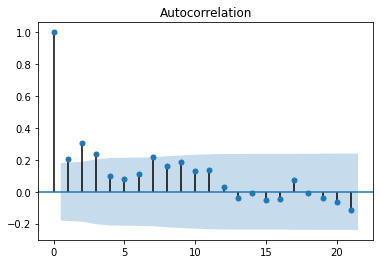

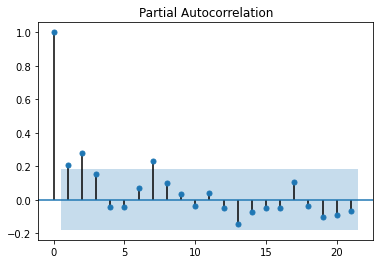

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series)
plot_pacf(series)
plt.show()

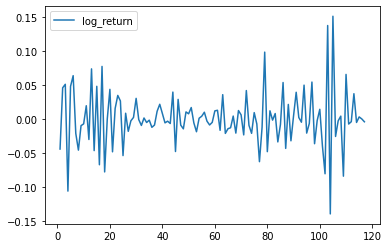

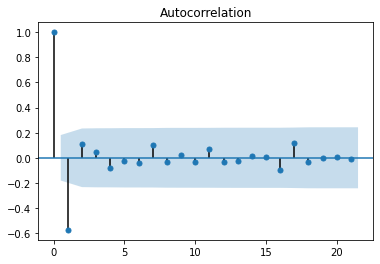

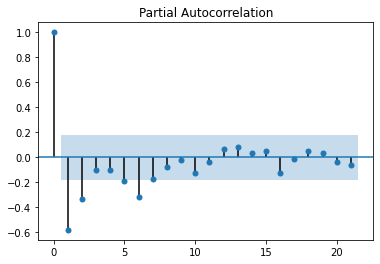

In [ ]:
diff_1=series.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [ ]:
series

,log_return
0,-0.001158
1,-0.045353
2,0.000832
3,0.052188
4,-0.054087
...,...
113,0.065375
114,0.060408
115,0.063627
116,0.063874


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(1,1,0))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.log_return   No. Observations:                  117
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 231.469
Method:                       css-mle   S.D. of innovations              0.033
Date:                Fri, 25 Nov 2022   AIC                           -458.938
Time:                        17:26:16   BIC                           -453.413
Sample:                             1   HQIC                          -456.695
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ar.L1.D.log_return    -0.5749      0.075     -7.640      0.000      -0.722      -0.427
                                    Roots                                    
                  Real       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


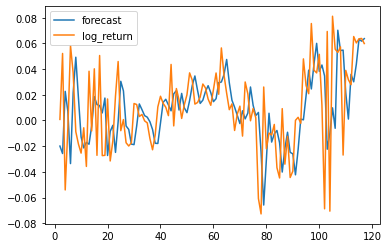

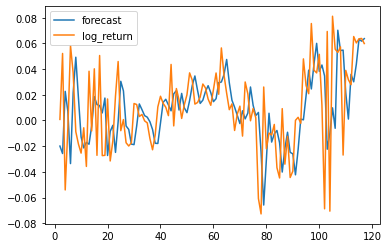

In [ ]:
model_fit.plot_predict()

### Rogistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
seqLength = 6 # window size 
dataDim = 1 
hiddenDim = 6 
outputDim = 1
lr = 0.01
iterations = 500


predict = []
pred_proba=[]
def buildDataSet(timeSeries, seqLength):
    xdata = []
    ydata = [] 
    for i in range(0, len(timeSeries)-seqLength):
        tx = timeSeries[i:i+seqLength]
        ty = timeSeries[i+seqLength]
        variable  = ty > 0
        y1 = variable.astype(int)
        xdata.append(tx)
        ydata.append(y1)
    return np.array(xdata), np.array(ydata)


In [ ]:
list_model = []

list_test_x = []
list_test_y = []

avg_score = 0

for i in range(118):
    trainSize = int(len(dataset.iloc[:,i])*0.8)
    trainSet = dataset.iloc[:,i][0:trainSize]
    testSet = dataset.iloc[:,i][trainSize-seqLength:]

    trainX, trainY = buildDataSet(trainSet, seqLength)
    testX, testY = buildDataSet(testSet, seqLength)

    model = LogisticRegression(C=10, penalty='l2')

    list_model.append(model)

    list_model[i].fit(trainX,trainY)
    trainscore = list_model[i].score(trainX,trainY)

    avg_score += trainscore/118

    list_test_x.append(testX)
    list_test_y.append(testY)

print(avg_score)

0.5798590817585562


In [ ]:
list_test_y[0]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
#7 모델 사용
list_predict = []
list_actual = list_test_y
proba=[]
pred_proba = []
for i in range(118):
    xhat = list_test_x[i]
    yhat = list_model[i].predict(xhat)
    list_predict.append(yhat)
    proba = list_model[i].predict_proba(xhat) #minus일 확률 
    probability = pd.DataFrame(proba, columns = ['Minus','Plus'])
    pred_proba.append(probability['Plus'])

In [ ]:
result = pd.DataFrame(pred_proba)
result.reset_index(drop=True, inplace = True)
result

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.541110,0.490536,0.525153,0.484308,0.493842,0.466149,0.489773,0.474031,0.408221,0.408350,...,0.628089,0.400410,0.570787,0.515275,0.491134,0.441730,0.522594,0.520350,0.473300,0.497062
1,0.439242,0.529014,0.452620,0.368452,0.468521,0.520079,0.453391,0.474618,0.578796,0.608785,...,0.295160,0.437374,0.529059,0.410643,0.406523,0.636653,0.639726,0.468515,0.577982,0.702268
2,0.584586,0.568984,0.559949,0.581047,0.588475,0.564482,0.586687,0.596968,0.587104,0.531906,...,0.548157,0.603295,0.577451,0.595074,0.572447,0.485842,0.545996,0.556339,0.606014,0.621803
3,0.465029,0.398067,0.475480,0.415660,0.448383,0.448107,0.409328,0.458280,0.345964,0.361657,...,0.337675,0.315366,0.379959,0.439815,0.600723,0.300041,0.394110,0.402729,0.443947,0.431372
4,0.447901,0.600040,0.497582,0.460352,0.562910,0.552561,0.538828,0.542334,0.668818,0.682537,...,0.266758,0.684994,0.741964,0.517570,0.302015,0.647502,0.596393,0.477810,0.687052,0.709202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.603728,0.563770,0.615297,0.610450,0.538208,0.521010,0.551203,0.441494,0.454182,0.442053,...,0.588704,0.774189,0.521842,0.707978,0.566720,0.432424,0.471367,0.555170,0.460585,0.505766
114,0.569583,0.509083,0.557706,0.497433,0.523860,0.552853,0.518683,0.486621,0.458003,0.442600,...,0.601262,0.712960,0.528123,0.567930,0.477854,0.404854,0.619739,0.557846,0.445952,0.414130
115,0.576345,0.541945,0.557703,0.521280,0.512265,0.522709,0.528091,0.485386,0.456140,0.460373,...,0.612120,0.728216,0.482806,0.594117,0.433007,0.423019,0.518727,0.610350,0.438485,0.425913
116,0.579314,0.544698,0.598620,0.556802,0.526508,0.530630,0.541542,0.475384,0.459920,0.469296,...,0.624126,0.774658,0.520729,0.651082,0.499735,0.412133,0.547380,0.596084,0.446557,0.465137


In [ ]:
result.to_csv('RL_pred_6d_LR.csv', index=False)

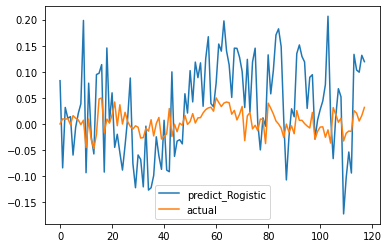

In [ ]:
plt.figure()
plt.plot(result[2]-0.5, label = "predict_Rogistic")
plt.plot(logdata[-199:].values[2],label = "actual")

plt.legend(prop={'size': 10})

In [ ]:
dataset[-199:].values[0]

array([-0.1157, -4.434 ,  0.0832,  5.3574, -5.265 , -0.5794,  6.0008,
        3.7779, -0.8656, -1.8224, -2.5088, -0.5676, -3.5152,  3.9089,
       -0.8117,  4.1049, -2.6776,  5.1896, -2.6991, -2.6778,  1.6891,
       -3.1033, -1.5704,  1.9296,  4.6986, -0.791 ,  0.0706, -1.7192,
       -1.9673, -1.7233,  1.33  ,  1.2517,  0.3077,  0.471 , -0.0304,
       -0.1865, -1.3906, -2.2547, -1.1194,  1.0673,  1.9053,  1.3439,
        1.0334,  0.3788,  4.4604, -0.4205,  2.5179,  1.6096,  0.1587,
        1.2263,  2.0218,  3.777 ,  3.1909,  1.2839,  1.4096,  1.8413,
        2.8793,  2.5674,  1.6823,  1.1906,  2.4228,  3.7677,  2.0638,
        5.8118,  3.6014,  2.1411,  0.8459,  1.2978, -0.7745,  0.4878,
        1.122 , -1.2085,  3.0434,  2.1008, -0.0224,  0.9371,  0.2099,
       -5.8928, -7.018 ,  2.6409, -2.1766, -0.9733, -1.1228, -0.308 ,
       -3.6089, -4.3777,  0.9265, -3.3446, -1.2284, -4.3427, -3.8714,
        0.0117,  0.2464, -0.2154,  4.9129,  2.768 ,  2.1076,  7.8426,
        3.9948,  3.7

In [ ]:
rate_value = int(118*0.1)

sum_high=0
sum_low=0

high_index=[]
low_index=[]

list_HmL = []
list_high = []
list_low = []
list_high_name = []
list_low_name = []

for j in range(132):
    
    high_index.append(result.iloc[:,j].sort_values()[-rate_value:].index.astype(int))
    low_index.append(result.iloc[:,j].sort_values()[:rate_value].index.astype(int))

    high = 0
    low = 0
    for i in range(rate_value):
        high += dataset[-132:].values[j][high_index[j][i]]
        low += dataset[-132:].values[j][low_index[j][i]]

    list_HmL.append(high-low)
    list_high.append(high)
    list_low.append(low)
    list_high_name.append(', '.join(dataset.columns[high_index[j]]))
    list_low_name.append(', '.join(dataset.columns[low_index[j]]))

    sum_high += high
    sum_low += low

print(sum_high)
print(sum_low)

512.6054000000001
-238.35079999999996


In [ ]:
df_hml_4_1 = pd.DataFrame(list_high, columns=['High(12d,25%)'])
df_hml_4_2 = pd.DataFrame(list_low, columns=['Low(12d,25%)'])
df_hml_4_3 = pd.DataFrame(list_HmL, columns=['High-Low(12d,25%)'])
df_hml_4_4 = pd.DataFrame(list_high_name, columns=['High_ANOMALIES(12d,25%)'])
df_hml_4_5 = pd.DataFrame(list_low_name, columns=['LOW-ANOMALIES(12d,25%)'])

df_hml_4 = pd.concat([df_hml_4_1,df_hml_4_2,df_hml_4_3,df_hml_4_4,df_hml_4_5], axis=1)
df_hml_4

,"High(12d,25%)","Low(12d,25%)","High-Low(12d,25%)","High_ANOMALIES(12d,25%)","LOW-ANOMALIES(12d,25%)"
0,-12.7150,-31.5931,18.8781,"beta_1, etl, r11_1, r20a, sim_12, resid11_6, r...","pta, dpia, ivc, noa, dnco, poa, r5n, rev_1, re..."
1,30.4533,-55.7512,86.2045,"r11_6, isff_1, vhp, r1a, ile_1, ilr_6, eg_12, ...","pda, cei, nsi, ig, dnco, opa, pta, dlno, dac, ..."
2,31.5422,17.5623,13.9799,"r5a, ilr_12, ilr_1, sue_1, bm, vhp, sim_1, im_...","ir, dpia, dwc, dii, dnco, opa, rev_1, ia, rev_..."
3,-9.5888,5.6242,-15.2130,"sue_1, etl, r6_1, isff_1, eg_6, droe_1, sp, si...","dtv_12, ir, dlno, dnca, ivc, rev_6, ivg, dac, ..."
4,7.4606,-4.8934,12.3540,"im_12, ilr_12, r1n, eg_12, rs_1, sue_6, gpa, r...","nsi, eprd, dnca, pda, pta, tv_1, cei, dii, vhp..."
...,...,...,...,...,...
127,33.1509,-20.3331,53.4840,"p52w_12, r6_6, epq_6, ilr_6, dnoa, p52w_6, ivc...","ig, bm, bmj, ig2, spq_1, nsi, spq_12, spq_6, e..."
128,2.8658,-56.1181,58.9839,"resid6_12, resid11_12, cpq_6, im_12, p52w_6, c...","rs_1, dlno, dii, dnca, me, pda, dcoa, ig2, ivc..."
129,1.4893,57.5861,-56.0968,"ilr_1, im_6, epq_6, ilr_6, dur, droe_12, ilr_1...","rev_1, r5n, rev_6, rev_12, ope, opa, dwc, roe_..."
130,83.5207,89.4211,-5.9004,"im_12, eg_1, r6_1, rev_12, ope, sue_6, cto, is...","pda, nsi, p52w_6, dbe, dnco, dpia, p52w_12, ia..."


In [ ]:
df_hml_3_1 = pd.DataFrame(list_high, columns=['High(12d,10%)'])
df_hml_3_2 = pd.DataFrame(list_low, columns=['Low(12d,10%)'])
df_hml_3_3 = pd.DataFrame(list_HmL, columns=['High-Low(12d,10%)'])
df_hml_3_4 = pd.DataFrame(list_high_name, columns=['High_ANOMALIES(12d,10%)'])
df_hml_3_5 = pd.DataFrame(list_low_name, columns=['LOW-ANOMALIES(12d,10%)'])

df_hml_3 = pd.concat([df_hml_3_1,df_hml_3_2,df_hml_3_3,df_hml_3_4,df_hml_3_5], axis=1)
df_hml_3

,"High(12d,10%)","Low(12d,10%)","High-Low(12d,10%)","High_ANOMALIES(12d,10%)","LOW-ANOMALIES(12d,10%)"
0,-7.0907,-11.5433,4.4526,"isff_1, resid6_6, r6_12, cim_1, eg_6, r1a, r11...","pta, dpia, ivc, noa, dnco, poa, r5n, rev_1, re..."
1,12.7475,-15.0397,27.7872,"im_6, eg_6, r6_1, ebp, me, r11_1, resid6_12, e...","pda, cei, nsi, ig, dnco, opa, pta, dlno, dac, ..."
2,14.3627,9.0765,5.2862,"resid6_12, r10a, eg_12, tbiq_6, r6_6, im_12, e...","ir, dpia, dwc, dii, dnco, opa, rev_1, ia, rev_..."
3,2.4948,4.5555,-2.0607,"dfin, roe_1, ebp, eg_1, resid6_6, etr, r6_12, ...","dtv_12, ir, dlno, dnca, ivc, rev_6, ivg, dac, ..."
4,5.1955,-7.3660,12.5615,"im_6, r6_1, eg_6, eg_1, dp, r6_12, r11_1, ile_...","nsi, eprd, dnca, pda, pta, tv_1, cei, dii, vhp..."
...,...,...,...,...,...
127,24.5246,-12.1004,36.6250,"resid11_1, eg_6, dtv_12, etl, ilr_1, eg_12, re...","ig, bm, bmj, ig2, spq_1, nsi, spq_12, spq_6, e..."
128,-3.3286,-25.3058,21.9772,"spq_12, cpq_1, r1a, epq_1, cim_12, eg_1, r11_1...","rs_1, dlno, dii, dnca, me, pda, dcoa, ig2, ivc..."
129,19.1479,34.7823,-15.6344,"r1n, cpq_6, r11_1, r1a, resid11_6, cpq_1, r5a,...","rev_1, r5n, rev_6, rev_12, ope, opa, dwc, roe_..."
130,15.0774,29.0799,-14.0025,"r10a, sp, sue_1, gpa, ig2, dur, spq_12, bmq_12...","pda, nsi, p52w_6, dbe, dnco, dpia, p52w_12, ia..."


In [ ]:
df_hml_2_1 = pd.DataFrame(list_high, columns=['High(6d,25%)'])
df_hml_2_2 = pd.DataFrame(list_low, columns=['Low(6d,25%)'])
df_hml_2_3 = pd.DataFrame(list_HmL, columns=['High-Low(6d,25%)'])
df_hml_2_4 = pd.DataFrame(list_high_name, columns=['High_ANOMALIES(6d,25%)'])
df_hml_2_5 = pd.DataFrame(list_low_name, columns=['LOW-ANOMALIES(6d,25%)'])

df_hml_2 = pd.concat([df_hml_2_1,df_hml_2_2,df_hml_2_3,df_hml_2_4,df_hml_2_5], axis=1)
df_hml_2

,"High(6d,25%)","Low(6d,25%)","High-Low(6d,25%)","High_ANOMALIES(6d,25%)","LOW-ANOMALIES(6d,25%)"
0,-24.1325,-18.7462,-5.3863,"etl, spq_12, sim_1, p52w_6, resid11_1, resid11...","dpia, noa, rev_12, rev_6, ia, pta, poa, dnoa, ..."
1,23.9443,-49.0001,72.9444,"r1n, resid11_1, sue_6, p52w_12, ioca, im_1, su...","pda, nsi, cei, ivff_1, ig, dii, eprd, dfnl, ir..."
2,25.9323,7.1541,18.7782,"r6_1, p52w_6, spq_12, resid11_12, r10a, tbiq_1...","dwc, ig2, dii, ia, dnco, dac, poa, ir, ig, nsi..."
3,-2.3573,8.2122,-10.5695,"sue_6, eg_6, sim_1, im_1, r5n, sgq_1, p52w_12,...","dtv_12, dnco, noa, dlno, dnca, ir, ivff_1, ep,..."
4,-2.2356,20.4393,-22.6749,"gpa, sgq_1, isff_1, im_12, ilr_6, sue_1, droe_...","nsi, dwc, pda, dnca, dnoa, dii, cei, ia, ig2, ..."
...,...,...,...,...,...
127,35.1957,-5.1759,40.3716,"cpq_12, im_6, resid6_12, droe_6, r6_12, ilr_1,...","ivff_1, dur, r5a, tv_1, r10n, nsi, dfnl, eprd,..."
128,-58.0803,-61.4698,3.3895,"p52w_6, epq_12, resid11_6, r10a, epq_6, ilr_6,...","dlno, dcoa, dpia, dii, dnca, rs_1, ivc, dwc, p..."
129,19.0632,26.4620,-7.3988,"r10n, ioca, p52w_6, dfin, spq_12, etl, epq_6, ...","rev_6, dcoa, noa, rev_12, ig, dwc, r5n, rev_1,..."
130,132.7108,-31.1953,163.9061,"roe_1, epq_1, r5a, droe_6, r6_6, cla, etr, roe...","pda, dbe, dcoa, nsi, bm, eprd, bmq_12, poa, ia..."


In [ ]:
df_hml_1_1 = pd.DataFrame(list_high, columns=['High(6d,10%)'])
df_hml_1_2 = pd.DataFrame(list_low, columns=['Low(6d,10%)'])
df_hml_1_3 = pd.DataFrame(list_HmL, columns=['High-Low(6d,10%)'])
df_hml_1_4 = pd.DataFrame(list_high_name, columns=['High_ANOMALIES(6d,10%)'])
df_hml_1_5 = pd.DataFrame(list_low_name, columns=['LOW-ANOMALIES(6d,10%)'])

df_hml_1 = pd.concat([df_hml_1_1,df_hml_1_2,df_hml_1_3,df_hml_1_4,df_hml_1_5], axis=1)
df_hml_1

,"High(6d,10%)","Low(6d,10%)","High-Low(6d,10%)","High_ANOMALIES(6d,10%)","LOW-ANOMALIES(6d,10%)"
0,-18.0374,-10.5210,-7.5164,"r1a, im_12, r11_1, resid6_12, droe_6, resid6_6...","dpia, noa, rev_12, rev_6, ia, pta, poa, dnoa, ..."
1,17.0352,-9.0544,26.0896,"resid11_6, r6_1, eg_1, im_6, resid6_6, ilr_12,...","pda, nsi, cei, ivff_1, ig, dii, eprd, dfnl, ir..."
2,16.8504,7.4983,9.3521,"sue_6, resid6_12, eg_1, ilr_12, r6_12, r6_6, i...","dwc, ig2, dii, ia, dnco, dac, poa, ir, ig, nsi..."
3,2.5020,0.4340,2.0680,"dfin, r10a, r6_12, r11_6, droe_1, ilr_6, eg_1,...","dtv_12, dnco, noa, dlno, dnca, ir, ivff_1, ep,..."
4,1.0387,6.2066,-5.1679,"im_6, r11_1, cto, r6_12, ope, resid6_6, r15a, ...","nsi, dwc, pda, dnca, dnoa, dii, cei, ia, ig2, ..."
...,...,...,...,...,...
127,15.3878,7.0444,8.3434,"rev_1, epq_6, cla, eg_12, epq_12, resid11_12, ...","ivff_1, dur, r5a, tv_1, r10n, nsi, dfnl, eprd,..."
128,-40.7478,-29.8112,-10.9366,"dtv_12, eg_12, r11_1, r6_6, ope, etl, epq_1, o...","dlno, dcoa, dpia, dii, dnca, rs_1, ivc, dwc, p..."
129,20.5312,31.2474,-10.7162,"r15a, bmj, resid11_6, ilr_12, resid6_12, r11_1...","rev_6, dcoa, noa, rev_12, ig, dwc, r5n, rev_1,..."
130,67.9179,-13.4551,81.3730,"cim_1, r11_12, eg_1, r11_1, resid11_12, resid6...","pda, dbe, dcoa, nsi, bm, eprd, bmq_12, poa, ia..."


In [ ]:
df_hml_final_LR = pd.concat([df_hml_1,df_hml_2,df_hml_3,df_hml_4], axis=1)
df_hml_final_LR

,"High(6d,10%)","Low(6d,10%)","High-Low(6d,10%)","High_ANOMALIES(6d,10%)","LOW-ANOMALIES(6d,10%)","High(6d,25%)","Low(6d,25%)","High-Low(6d,25%)","High_ANOMALIES(6d,25%)","LOW-ANOMALIES(6d,25%)","High(12d,10%)","Low(12d,10%)","High-Low(12d,10%)","High_ANOMALIES(12d,10%)","LOW-ANOMALIES(12d,10%)","High(12d,25%)","Low(12d,25%)","High-Low(12d,25%)","High_ANOMALIES(12d,25%)","LOW-ANOMALIES(12d,25%)"
0,-18.0374,-10.5210,-7.5164,"r1a, im_12, r11_1, resid6_12, droe_6, resid6_6...","dpia, noa, rev_12, rev_6, ia, pta, poa, dnoa, ...",-24.1325,-18.7462,-5.3863,"etl, spq_12, sim_1, p52w_6, resid11_1, resid11...","dpia, noa, rev_12, rev_6, ia, pta, poa, dnoa, ...",-7.0907,-11.5433,4.4526,"isff_1, resid6_6, r6_12, cim_1, eg_6, r1a, r11...","pta, dpia, ivc, noa, dnco, poa, r5n, rev_1, re...",-12.7150,-31.5931,18.8781,"beta_1, etl, r11_1, r20a, sim_12, resid11_6, r...","pta, dpia, ivc, noa, dnco, poa, r5n, rev_1, re..."
1,17.0352,-9.0544,26.0896,"resid11_6, r6_1, eg_1, im_6, resid6_6, ilr_12,...","pda, nsi, cei, ivff_1, ig, dii, eprd, dfnl, ir...",23.9443,-49.0001,72.9444,"r1n, resid11_1, sue_6, p52w_12, ioca, im_1, su...","pda, nsi, cei, ivff_1, ig, dii, eprd, dfnl, ir...",12.7475,-15.0397,27.7872,"im_6, eg_6, r6_1, ebp, me, r11_1, resid6_12, e...","pda, cei, nsi, ig, dnco, opa, pta, dlno, dac, ...",30.4533,-55.7512,86.2045,"r11_6, isff_1, vhp, r1a, ile_1, ilr_6, eg_12, ...","pda, cei, nsi, ig, dnco, opa, pta, dlno, dac, ..."
2,16.8504,7.4983,9.3521,"sue_6, resid6_12, eg_1, ilr_12, r6_12, r6_6, i...","dwc, ig2, dii, ia, dnco, dac, poa, ir, ig, nsi...",25.9323,7.1541,18.7782,"r6_1, p52w_6, spq_12, resid11_12, r10a, tbiq_1...","dwc, ig2, dii, ia, dnco, dac, poa, ir, ig, nsi...",14.3627,9.0765,5.2862,"resid6_12, r10a, eg_12, tbiq_6, r6_6, im_12, e...","ir, dpia, dwc, dii, dnco, opa, rev_1, ia, rev_...",31.5422,17.5623,13.9799,"r5a, ilr_12, ilr_1, sue_1, bm, vhp, sim_1, im_...","ir, dpia, dwc, dii, dnco, opa, rev_1, ia, rev_..."
3,2.5020,0.4340,2.0680,"dfin, r10a, r6_12, r11_6, droe_1, ilr_6, eg_1,...","dtv_12, dnco, noa, dlno, dnca, ir, ivff_1, ep,...",-2.3573,8.2122,-10.5695,"sue_6, eg_6, sim_1, im_1, r5n, sgq_1, p52w_12,...","dtv_12, dnco, noa, dlno, dnca, ir, ivff_1, ep,...",2.4948,4.5555,-2.0607,"dfin, roe_1, ebp, eg_1, resid6_6, etr, r6_12, ...","dtv_12, ir, dlno, dnca, ivc, rev_6, ivg, dac, ...",-9.5888,5.6242,-15.2130,"sue_1, etl, r6_1, isff_1, eg_6, droe_1, sp, si...","dtv_12, ir, dlno, dnca, ivc, rev_6, ivg, dac, ..."
4,1.0387,6.2066,-5.1679,"im_6, r11_1, cto, r6_12, ope, resid6_6, r15a, ...","nsi, dwc, pda, dnca, dnoa, dii, cei, ia, ig2, ...",-2.2356,20.4393,-22.6749,"gpa, sgq_1, isff_1, im_12, ilr_6, sue_1, droe_...","nsi, dwc, pda, dnca, dnoa, dii, cei, ia, ig2, ...",5.1955,-7.3660,12.5615,"im_6, r6_1, eg_6, eg_1, dp, r6_12, r11_1, ile_...","nsi, eprd, dnca, pda, pta, tv_1, cei, dii, vhp...",7.4606,-4.8934,12.3540,"im_12, ilr_12, r1n, eg_12, rs_1, sue_6, gpa, r...","nsi, eprd, dnca, pda, pta, tv_1, cei, dii, vhp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,15.3878,7.0444,8.3434,"rev_1, epq_6, cla, eg_12, epq_12, resid11_12, ...","ivff_1, dur, r5a, tv_1, r10n, nsi, dfnl, eprd,...",35.1957,-5.1759,40.3716,"cpq_12, im_6, resid6_12, droe_6, r6_12, ilr_1,...","ivff_1, dur, r5a, tv_1, r10n, nsi, dfnl, eprd,...",24.5246,-12.1004,36.6250,"resid11_1, eg_6, dtv_12, etl, ilr_1, eg_12, re...","ig, bm, bmj, ig2, spq_1, nsi, spq_12, spq_6, e...",33.1509,-20.3331,53.4840,"p52w_12, r6_6, epq_6, ilr_6, dnoa, p52w_6, ivc...","ig, bm, bmj, ig2, spq_1, nsi, spq_12, spq_6, e..."
128,-40.7478,-29.8112,-10.9366,"dtv_12, eg_12, r11_1, r6_6, ope, etl, epq_1, o...","dlno, dcoa, dpia, dii, dnca, rs_1, ivc, dwc, p...",-58.0803,-61.4698,3.3895,"p52w_6, epq_12, resid11_6, r10a, epq_6, ilr_6,...","dlno, dcoa, dpia, dii, dnca, rs_1, ivc, dwc, p...",-3.3286,-25.3058,21.9772,"spq_12, cpq_1, r1a, epq_1, cim_12, eg_1, r11_1...","rs_1, dlno, dii, dnca, me, pda, dcoa, ig2, ivc...",2.8658,-56.1181,58.9839,"resid6_12, resid1

In [ ]:
df_hml_final_LR.to_csv('RL_HML_132_LR.csv')

In [ ]:
q_high_index=[]
q_low_index=[]
quantile = int(118*0.25)
for i in range(199):
    q_high_index.append(result[i].sort_values()[-quantile:].index)
    q_low_index.append(result[i].sort_values()[:quantile].index)
    

In [ ]:
#로지스틱결과임
sum_high=0
sum_low=0
for j in range(199):
    high = 0
    low = 0
    for i in range(quantile):
        high += dataset[-199:].values[j][q_high_index[j][i]]
        low += dataset[-199:].values[j][q_low_index[j][i]]
    sum_high += high
    sum_low += low

print(sum_high)
print(sum_low)

-62.06089999999961
692.4852000000006
